# ACELERA_DEV | DATA SCIENCE | SEMANA 8

# DESAFIO: Prever as melhores notas de matemática do ENEM 2016

# IMPORT DAS BIBLIOTECAS

In [1]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import missingno as msno

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# LOAD  DOS DATASETS TRAIN E TEST

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


# IGUALANDO AS VARIÁVEIS NO TRAIN E NO TEST

In [4]:
df_train.shape,df_test.shape

((13730, 167), (4576, 47))

In [5]:
cols_test = df_test.columns.sort_values()
df_test = df_test[cols_test]
cols_test = cols_test.append(pd.Index(['NU_NOTA_MT'])).sort_values()
df_train = df_train[cols_test]
df_train.shape,df_test.shape

((13730, 48), (4576, 47))

# ANÁLISE DOS VALORE NULOS (NaN)

## Dropando colunas com significativa qtd de NaN:

In [6]:
df_train.drop(columns=['TP_DEPENDENCIA_ADM_ESC','TP_ENSINO'],axis=1,inplace=True)
df_test.drop(columns=['TP_DEPENDENCIA_ADM_ESC','TP_ENSINO'],axis=1,inplace=True)
df_train.shape,df_test.shape

((13730, 46), (4576, 45))

## Substituindo NaN por 0 nas variaveis relacionadas as Provas:

As provas de LC e MT foram realizadas no mesmo dia (06/11/2016), e as provas de CN e CH no dia 05/11/16
Todas as variaveis relacionadas as Provas e Redacao possuem numeros de NaN identicos entre LC e MT, e CN e CH, inclusive as variaveis TP_PRESENCA. Desta forma podemos concluir que os alunos não estiveram presentes  ou no primeiro dia, ou no segundo ou em ambos. Logo podemos substituir os NaN por 0.

In [7]:
df_train.fillna(value=0,axis=1,inplace=True)
df_test.fillna(value=0,axis=1,inplace=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x119e552d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x125e96210>)

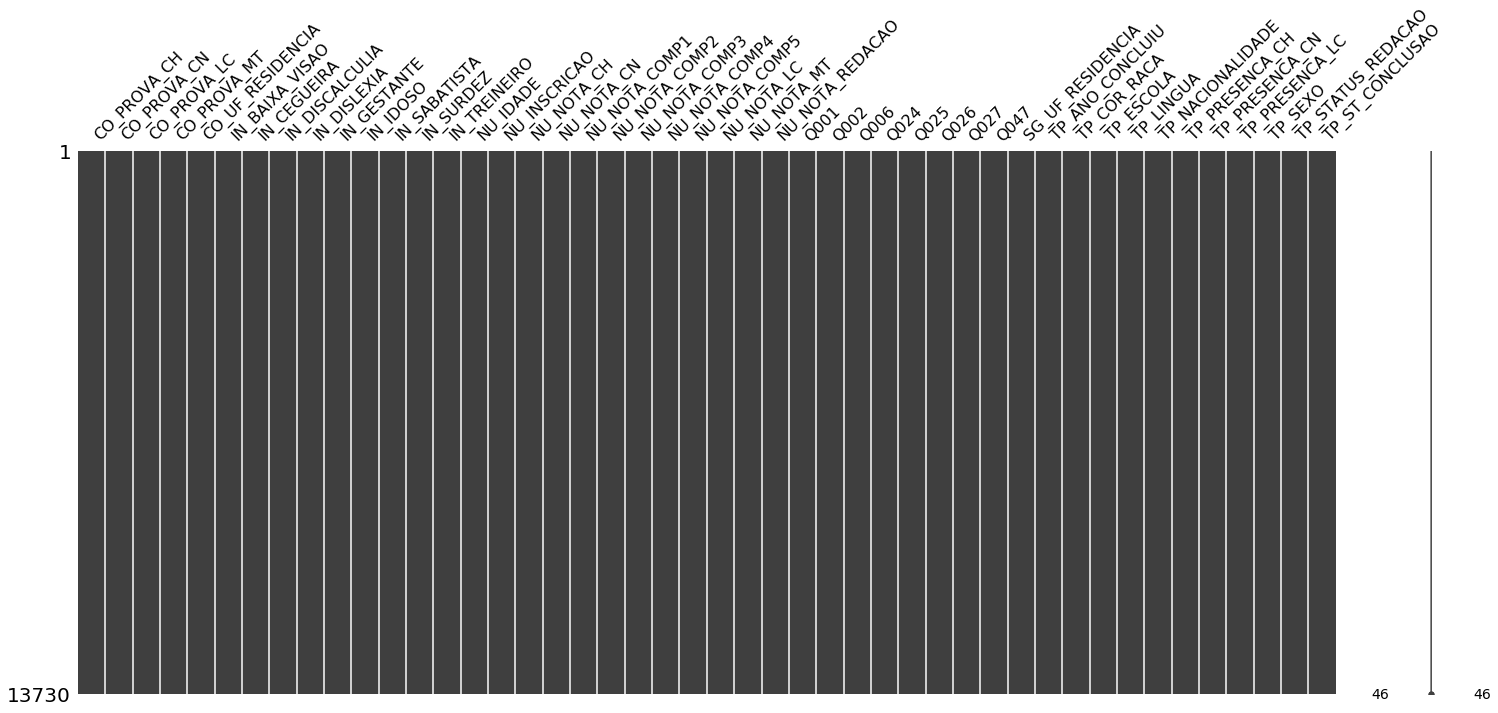

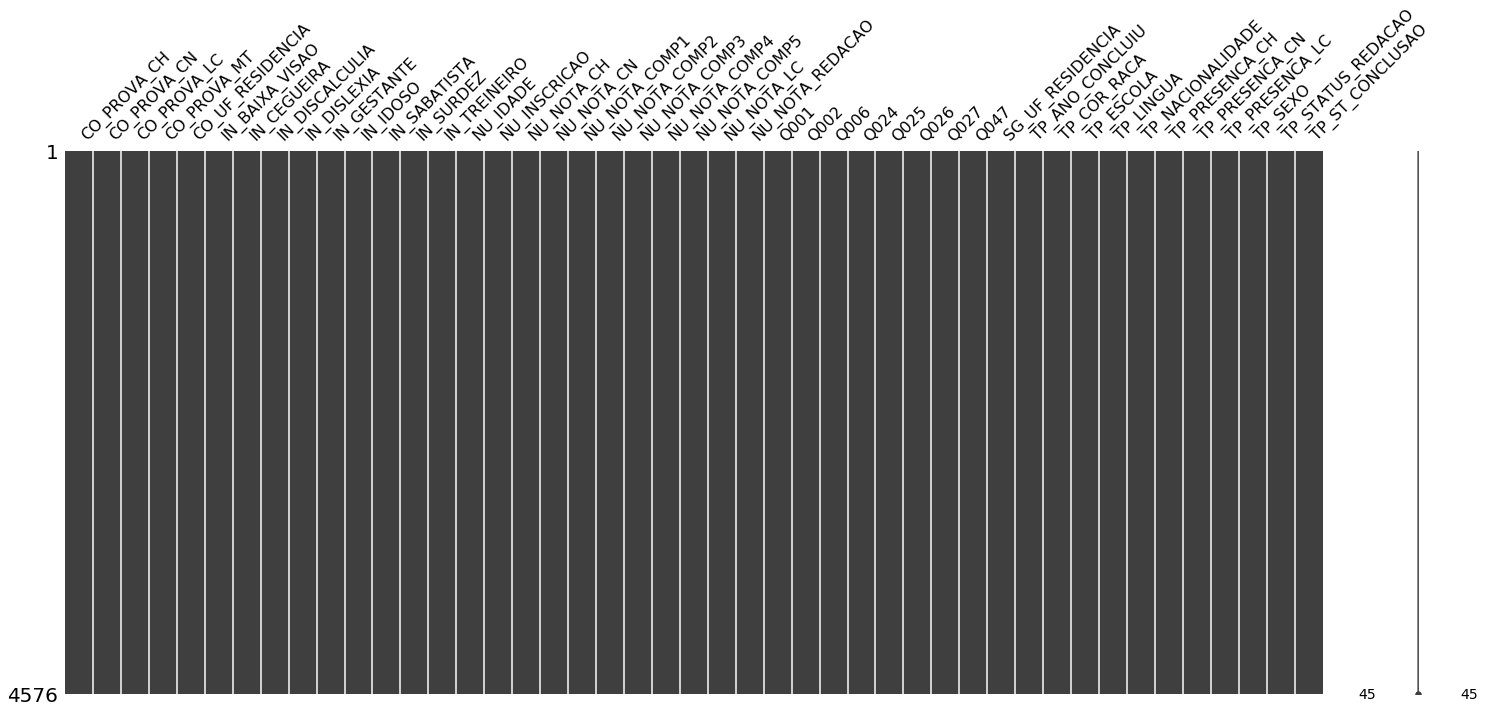

In [8]:
msno.matrix(df_train),msno.matrix(df_test)


In [9]:
df_train.describe().transpose(),df_test.describe().transpose()

(                     count        mean         std   min      25%    50%    75%     max
 CO_UF_RESIDENCIA   13730.0   30.736708    9.862405  11.0   23.000   31.0   35.0    53.0
 IN_BAIXA_VISAO     13730.0    0.001238    0.035167   0.0    0.000    0.0    0.0     1.0
 IN_CEGUEIRA        13730.0    0.000000    0.000000   0.0    0.000    0.0    0.0     0.0
 IN_DISCALCULIA     13730.0    0.000073    0.008534   0.0    0.000    0.0    0.0     1.0
 IN_DISLEXIA        13730.0    0.000073    0.008534   0.0    0.000    0.0    0.0     1.0
 IN_GESTANTE        13730.0    0.000947    0.030757   0.0    0.000    0.0    0.0     1.0
 IN_IDOSO           13730.0    0.000146    0.012069   0.0    0.000    0.0    0.0     1.0
 IN_SABATISTA       13730.0    0.009687    0.097947   0.0    0.000    0.0    0.0     1.0
 IN_SURDEZ          13730.0    0.000364    0.019080   0.0    0.000    0.0    0.0     1.0
 IN_TREINEIRO       13730.0    0.129862    0.336163   0.0    0.000    0.0    0.0     1.0
 NU_IDADE           1

# CORREÇÃO DOS TIPOS DAS VARIÁVEIS

In [10]:
df_train.dtypes

CO_PROVA_CH           object
CO_PROVA_CN           object
CO_PROVA_LC           object
CO_PROVA_MT           object
CO_UF_RESIDENCIA       int64
IN_BAIXA_VISAO         int64
IN_CEGUEIRA            int64
IN_DISCALCULIA         int64
IN_DISLEXIA            int64
IN_GESTANTE            int64
IN_IDOSO               int64
IN_SABATISTA           int64
IN_SURDEZ              int64
IN_TREINEIRO           int64
NU_IDADE               int64
NU_INSCRICAO          object
NU_NOTA_CH           float64
NU_NOTA_CN           float64
NU_NOTA_COMP1        float64
NU_NOTA_COMP2        float64
NU_NOTA_COMP3        float64
NU_NOTA_COMP4        float64
NU_NOTA_COMP5        float64
NU_NOTA_LC           float64
NU_NOTA_MT           float64
NU_NOTA_REDACAO      float64
Q001                  object
Q002                  object
Q006                  object
Q024                  object
Q025                  object
Q026                  object
Q027                  object
Q047                  object
SG_UF_RESIDENC

In [11]:
tipos_train = df_train.dtypes[df_train.dtypes=='int64']
tipos_train

CO_UF_RESIDENCIA    int64
IN_BAIXA_VISAO      int64
IN_CEGUEIRA         int64
IN_DISCALCULIA      int64
IN_DISLEXIA         int64
IN_GESTANTE         int64
IN_IDOSO            int64
IN_SABATISTA        int64
IN_SURDEZ           int64
IN_TREINEIRO        int64
NU_IDADE            int64
TP_ANO_CONCLUIU     int64
TP_COR_RACA         int64
TP_ESCOLA           int64
TP_LINGUA           int64
TP_NACIONALIDADE    int64
TP_PRESENCA_CH      int64
TP_PRESENCA_CN      int64
TP_PRESENCA_LC      int64
TP_ST_CONCLUSAO     int64
dtype: object

In [12]:
for i in tipos_train.index:
    df_train[i] = df_train[i].astype('object')
    df_test[i] = df_test[i].astype('object')
df_train.NU_IDADE = df_train.NU_IDADE.astype('int64')
df_train.TP_STATUS_REDACAO = df_train.TP_STATUS_REDACAO.astype('object')
df_test.NU_IDADE = df_test.NU_IDADE.astype('int64')
df_test.TP_STATUS_REDACAO = df_test.TP_STATUS_REDACAO.astype('object')
df_train.dtypes , df_test.dtypes

(CO_PROVA_CH           object
 CO_PROVA_CN           object
 CO_PROVA_LC           object
 CO_PROVA_MT           object
 CO_UF_RESIDENCIA      object
 IN_BAIXA_VISAO        object
 IN_CEGUEIRA           object
 IN_DISCALCULIA        object
 IN_DISLEXIA           object
 IN_GESTANTE           object
 IN_IDOSO              object
 IN_SABATISTA          object
 IN_SURDEZ             object
 IN_TREINEIRO          object
 NU_IDADE               int64
 NU_INSCRICAO          object
 NU_NOTA_CH           float64
 NU_NOTA_CN           float64
 NU_NOTA_COMP1        float64
 NU_NOTA_COMP2        float64
 NU_NOTA_COMP3        float64
 NU_NOTA_COMP4        float64
 NU_NOTA_COMP5        float64
 NU_NOTA_LC           float64
 NU_NOTA_MT           float64
 NU_NOTA_REDACAO      float64
 Q001                  object
 Q002                  object
 Q006                  object
 Q024                  object
 Q025                  object
 Q026                  object
 Q027                  object
 Q047     

In [13]:
cols_train_intfloat = df_train.dtypes[df_train.dtypes!='object'].index
cols_test_intfloat = df_test.dtypes[df_test.dtypes!='object'].index
print(cols_train_intfloat)
print(cols_test_intfloat)

Index(['NU_IDADE', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], dtype='object')
Index(['NU_IDADE', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_LC', 'NU_NOTA_REDACAO'], dtype='object')


# CORRELAÇÕES

Corr[NU_IDADE]: -0.24
Corr[NU_NOTA_CH]: 0.9
Corr[NU_NOTA_CN]: 0.91
Corr[NU_NOTA_COMP1]: 0.88
Corr[NU_NOTA_COMP2]: 0.86
Corr[NU_NOTA_COMP3]: 0.85
Corr[NU_NOTA_COMP4]: 0.87
Corr[NU_NOTA_COMP5]: 0.72
Corr[NU_NOTA_LC]: 0.94
Corr[NU_NOTA_REDACAO]: 0.88


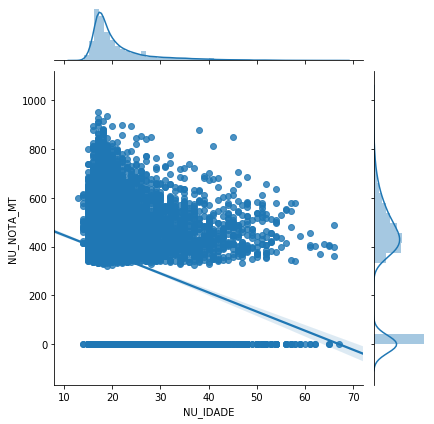

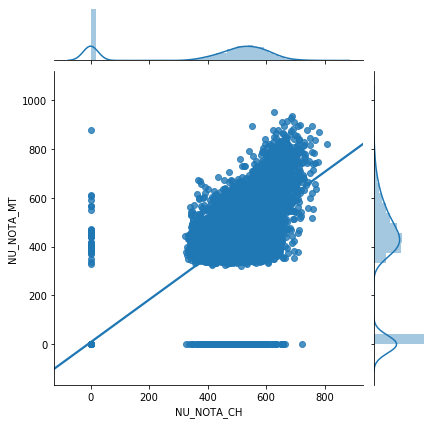

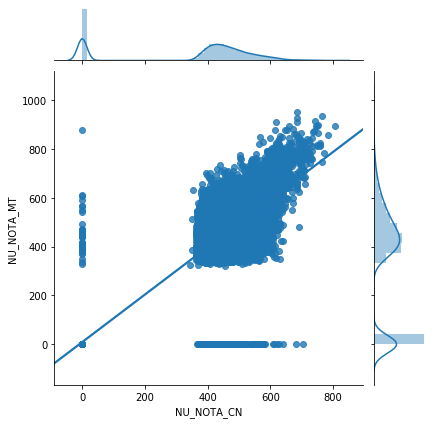

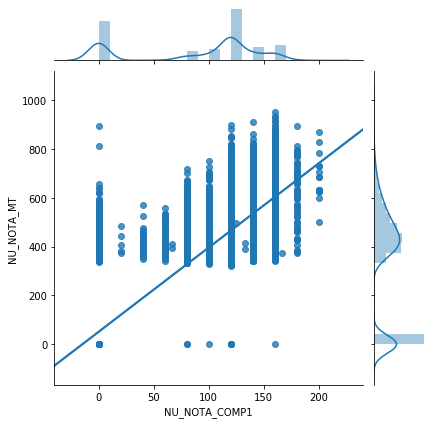

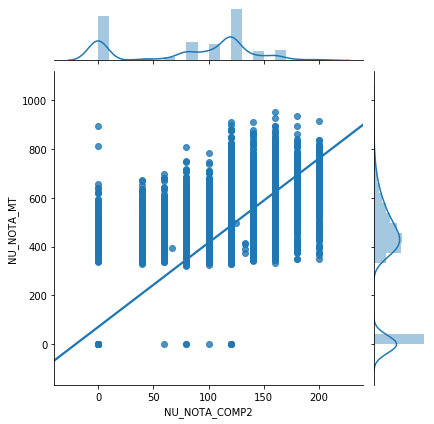

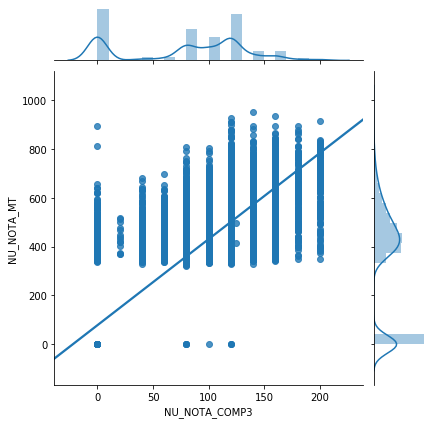

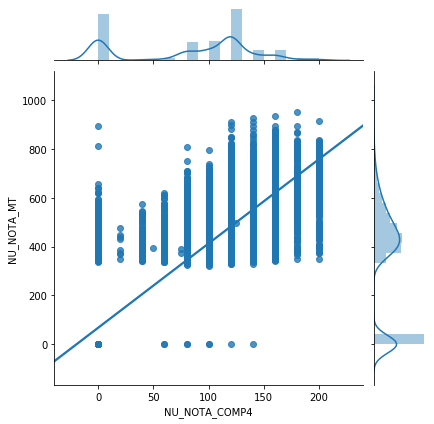

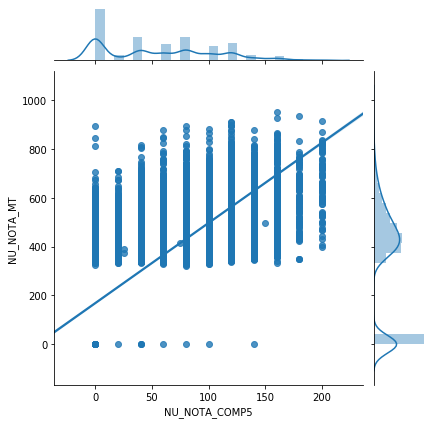

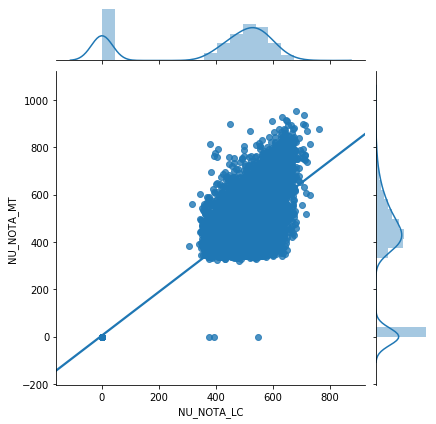

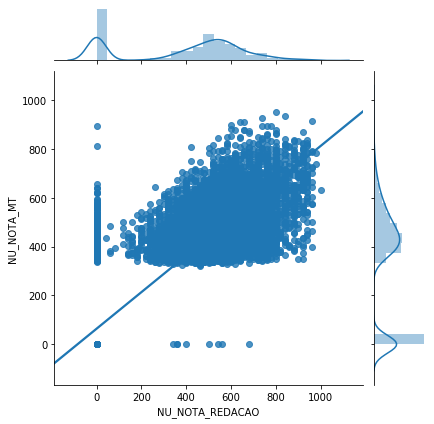

In [14]:
for n in df_train[cols_test_intfloat]:
    g = sns.jointplot(x = df_train[n], y = df_train['NU_NOTA_MT'],kind="reg")
    print("Corr[{}]: {}".format(n,df_train.corr()['NU_NOTA_MT'][n].round(2)))

# LINEAR REGRESSION
Score: 92,97%

DEFINIÇÃO DE BASELINE ANTES DE REALIZAR FEATURE ENGINEERING

In [15]:
X_train = df_train[cols_train_intfloat].drop('NU_NOTA_MT',axis=1)
y_train = df_train['NU_NOTA_MT']
X_test = df_test[cols_test_intfloat]
print(X_train.shape,y_train.shape)
print(X_test.shape)

(13730, 10) (13730,)
(4576, 10)


In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_baseline = lr.predict(X_test)
y_pred_baseline

array([424.13948243, 482.29573243, 563.51448243, ..., 593.45198243,
       490.63948243,  -4.80321909])

In [17]:
df_test_baseline = df_test.copy()
df_test_baseline['NU_NOTA_MT'] = y_pred_baseline
df_test_baseline.shape

(4576, 46)

## AJUSTE DO y_pred ATRIBUINDO NU_NOTA_MT=0 ONDE TP_PRESENCA_LC ==0, POIS COMO AS PROVAS DE MT E LC FORAM APLICADAS NA MESMA DATA, CONCLUI-SE QUE A NÃO PRESENÇA NA PROVA DE LC SIGINIFICA A NÃO PRESENÇA NA PROVA DE MT

In [18]:
for i in range(0,len(df_test_baseline)):
    if df_test_baseline['TP_PRESENCA_LC'][i] == 0:
        df_test_baseline['NU_NOTA_MT'][i] = 0

/Users/amigosdadancamooca/codenation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#answer_baseline=df_test_baseline[['NU_INSCRICAO','NU_NOTA_MT']]
#answer_baseline.to_csv('answer.csv',index=False)

Após submeter o arquivo answer acima, o score obtido foi: 92,97%
COMO O SCORE DO BASELINE JÁ FOI SATISFATÓRIO, NÃO SERÁ APLICADA FEATURE ENGINEERING, MAS APENAS PARA CONCEITUAR, AS POSSIVEIS MELHORIAS NO MODELO SERIAM:
* DUMMIE NAS FEATURES CATEGORICAS (EXCETO NU_INSCRICAO)
* STANDARD SCALER NAS FEATURES CONTINUAS
* TALVEZ PCA OBJETIVANDO REDUÇÃO DE DIMENSIONALIDADE